## Analisando as características de vulcões que entraram em erupção

Esta análise tem intuito de desvendar algumas curiosidades sobre estes vulcões que provavelmente entraram em erupção e padrões dos mesmos afim de verificar, por exemplo, se algum tipo de vulcão predomina em alguma região,

mudar -- porém a análise principal é sobre os 3  tipos principais de vulcão, que características são mais determinantes de cada um,

Curiosidade: os 3 tipos mais frequentes são: vulcão-escudo, cones de escória, estratovulcões, porém deste dataset ainda iremos descobrir. :)

![title](img/volcano1.jpg)

### Sobre o dataset:

Este conjunto de dados contem aproximadamente 1400 vulcões que entraram em erupção desde o período Holoceno (aproximadamente 10.000 anos atrás).

O dataset contem 13 colunas, e elas são:

- Volcano Number: número cadastrado do vulcão, podemos dizer que é o id;
- Volcano Name: nome do vulcão;
- Country: país onde o vulcão está;
- Primary Volcano Type: tipo primário do vulcão, os 3 tipos mais comun são vulcão-escudo, cones de escória, estratovulcões. Saiba mais sobre eles aqui. (obs: não sabia que vulcões eram tão legais)
- Activity Evidence: evidências que o vulcão esteve em atividade;
- Last Know Eruption: ano da última erupção que se tem conhecimento, detalhe que CE significa Common Era, o ano 1 em CE é o mesmo que o ano 1 em DC (Depois de Cristo), e BCE (Before Common Era)  corresponde ao AC (Antes de Cristo);
- Region: região onde o vulcão se encontra;
- Subregion: sub-região onde o vulcão se encontra;
- Latitude: latitude do vulcão;
- Longitude: longitude do vulcão;
- Elevation (m): elevação em metros do vulcão em relação ao nível do mar;
- Dominant Rock Type: tipo de rocha dominante no vulcão;
- Tectonic Setting: cenário tectônico;

## As perguntas que iremos responder são:

1 - Quais os 5 países com mais vulcões?

2 - Qual a região com mais vulcões e a que tem menos?

3 - Qual o tipo de vulcão que aparece mais vezes?

4 - Quais os tipos de rochas mais predominantes?

5 - Quais os vulcões mais altos?

#### E por fim a análise final:

Vamos descobrir as características dos vulcões que estão presentes na América do Sul


In [6]:
# Importando bibliotecas
# Vamos importar as libs que pretendemos usar ao longo do projeto
import pandas as pd
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Lendo arquivo de dados de vulcões
df = pd.read_csv('Volcano-Eruptions.csv')

# Testando se a importação ocorreu bem
df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone(s),Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone(s),Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


## Funções helper:

Aqui vamos colocar as funções que usaremos durante a análise, isso organiza e não polui a mesma

In [7]:
# Função que faz o pie chart (gráfico de pizza) mostrar os valores e a porcentagem
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

## Paleta de Cores:

Paleta de cores que será usada no dataset

In [8]:
# Estas cores combinam com vulcões 8-)
colors=['#6c1003','#8f4444', '#a91a05', '#ff8d5c', '#a25a3b']

![title](img/volcano4.jpg)

# Limpeza de dados

Nesta etapa verificar quais colunas apresentam dados faltantes e decidir o que fazer fazer com elas

Usaremos agora um método que identifica quais colunas possuem dados vazios, e quantos são:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
Volcano Number          1436 non-null int64
Volcano Name            1436 non-null object
Country                 1436 non-null object
Primary Volcano Type    1436 non-null object
Activity Evidence       1436 non-null object
Last Known Eruption     1436 non-null object
Region                  1436 non-null object
Subregion               1436 non-null object
Latitude                1436 non-null float64
Longitude               1436 non-null float64
Elevation (m)           1436 non-null int64
Dominant Rock Type      1422 non-null object
Tectonic Setting        1431 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 145.9+ KB


## Explorando o conjunto de dados:

O dataset contem 1436 registros, 13 colunas e os tipos de dados são:
- int
- float
- string

Note que para aqui o tipo object representa o conhecido string

Agora que conhecemos melhor nosso dataset, vamos ver quais colunas contem dados vazios

In [10]:
df.isnull().sum()

Volcano Number           0
Volcano Name             0
Country                  0
Primary Volcano Type     0
Activity Evidence        0
Last Known Eruption      0
Region                   0
Subregion                0
Latitude                 0
Longitude                0
Elevation (m)            0
Dominant Rock Type      14
Tectonic Setting         5
dtype: int64

## Os dados faltantes

As colunas com dados vazios são:

- Dominant Rock Type
- Tectonic Setting

Vamos verificar o tipo dos dados, pois com essa informação poderemos tomar melhor nossa decisão

In [11]:
rocktype     = df['Dominant Rock Type'].dtype
tectonictype = df['Tectonic Setting'].dtype

print("O tipo da coluna 'Dominant Rock Type' é {} e o tipo de Tectonic Setting é {}".format(rocktype,tectonictype))

O tipo da coluna 'Dominant Rock Type' é object e o tipo de Tectonic Setting é object


## Definindo o que faremos:

Aqui cabe uma importante observação, colunas com o tipo 'object' no pandas são equivalentes a strings, ou seja, texto

Como strings são dados importantes, meu julgamento é que devemos remover estas linhas faltantes para não comprometer a integridade dos dados

Acho errado 'inventarmos' um valor para preencher estas linhas apenas para usar o dataset completo

Porém caso fosse uma coluna numérica, poderiamos até tirar a média e completar os valores faltantes com ela, mas neste caso específico minha decisão é de remover estas colunas

In [12]:
# Removando da coluna Dominant
df.dropna(subset=['Dominant Rock Type'], inplace=True)

# Removendo da coluna Tectonic Setting
df.dropna(subset=['Tectonic Setting'], inplace=True)

## Estratovulcões e Pyroclastic cone:

Temos mais um problema, na coluna de tipos de vulcões temos a presença de 'Stratovolcano' e 'Stratovolcano(es)', que seria o plural,

O mesmo acontec com Pyroclastic cone,

Assim vamos categorizar este tipo como 'Stratovulcano', facilitando nossa análise

In [13]:
# Substituindo o valor de 'StratStratovolcano(es)' para 'Stratovolcano'
df.loc[df['Primary Volcano Type'] == 'Stratovolcano(es)', 'Primary Volcano Type'] = 'Stratovolcano'
df.loc[df['Primary Volcano Type'] == 'Pyroclastic cone(s)', 'Primary Volcano Type'] = 'Pyroclastic cone'

df.head()

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Maar(s),Eruption Dated,8300 BCE,Mediterranean and Western Asia,Western Europe,50.170,6.85,600,Foidite,Rift zone / Continental crust (>25 km)
1,210020,Chaine des Puys,France,Lava dome(s),Eruption Dated,4040 BCE,Mediterranean and Western Asia,Western Europe,45.775,2.97,1464,Basalt / Picro-Basalt,Rift zone / Continental crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Pyroclastic cone,Evidence Credible,Unknown,Mediterranean and Western Asia,Western Europe,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Pyroclastic cone,Eruption Dated,3600 BCE,Mediterranean and Western Asia,Western Europe,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental crust (>25 km)
4,211001,Larderello,Italy,Explosion crater(s),Eruption Observed,1282 CE,Mediterranean and Western Asia,Italy,43.250,10.87,500,No Data (checked),Subduction zone / Continental crust (>25 km)


## Checando as mudanças:

Vamos agora refazer o teste de células nulas

In [14]:
df.isnull().sum()

Volcano Number          0
Volcano Name            0
Country                 0
Primary Volcano Type    0
Activity Evidence       0
Last Known Eruption     0
Region                  0
Subregion               0
Latitude                0
Longitude               0
Elevation (m)           0
Dominant Rock Type      0
Tectonic Setting        0
dtype: int64

## Resumo limpeza de dados:

Verficamos que duas colunas possuiam dados nulos, elas eram:

- Dominant Rock Type
- Tectonic Setting

Utilizamos o metodo dropna para eliminar as mesmas, e agora podemos seguir com nosso dataset pronto para utilização

Já nos tipos de vulcões foi evidenciado que algus vinham em plural, e para deixar a análise mais precisa foi decidido juntar o plural e o singular, nestes casos:

- 'Stratovolcano(es)' para 'Stratovolcano'
- 'Pyroclastic cone(s)' para 'Pyroclastic cone'

# Análise:

Como visto não há mais celulas nulas, podemos prosseguir a próxima etapa

## Iniciando a responder as perguntas

Agora vamos responder as perguntas destinadas a esta análise

### 1 - Quais os 5 países com mais vulcões?

In [15]:
'''
    Vamos separar em partes o que fizemos aqui
    
    1 - Com o método groupby agrupamos o dataset pelo país
    2 - Com isso escolhemos a coluna 'Volcano Number' para usar o count e ver quantos elementos estão presentes em cada país,
        ou seja, quantos vulcões existem
    3 - Com o total em mãos utilizamos o método sort_values com a ordenação descendente para mostrar os países com mais 
        ocorrências
    4 - Por fim o método head com limite de 5, para mostrar os 5 países com mais vulcões e chegar na nossa resposta
''' 
topCountries = df.groupby(['Country'])['Volcano Number'].count().sort_values(ascending=False).head(5)

topCountries

Country
United States    167
Russia           144
Indonesia        127
Japan            105
Chile             73
Name: Volcano Number, dtype: int64

![title](img/volcano3.jpg)

## Ajuste de dados:

Bom, já temos a resposta, porém para apresentar a mesma de uma forma mais legível vou fazer 
algumas modificações abaixo

In [16]:
# Primeiramente transformar a Series que temos em um DataFrame
dfCountries = topCountries.to_frame().reset_index()

# Agora vamos renomear a coluna para fazer mais sentido
dfCountries = dfCountries.rename(columns={'Volcano Number': 'Volcanoes Count'})

# Aqui está o nosso Dataset de contagem de vulcões, mais organizado e fácil de trabalhar
dfCountries

,Country,Volcanoes Count
0,United States,167
1,Russia,144
2,Indonesia,127
3,Japan,105
4,Chile,73


In [17]:
# Vamos agora responder a pergunta
country = dfCountries['Country']
count   = dfCountries['Volcanoes Count']

# Adicionando um print mostrando quais são os 5 países com mais vulcões, em ordem
print(
      "Os 5 países com mais vulcões são {}, {}, {}, {} e {} respectivamente"
      .format(country[0],country[1],country[2],country[3],country[4])
     )

Os 5 países com mais vulcões são United States, Russia, Indonesia, Japan e Chile respectivamente


## Representação gráfica 1ª pergunta:

Vamos representar por meio de gráfico os 5 países e mostrando a contagem de vulcões

obs: É uma parte opicional, porém para pessoas leigas em programação torna a visualização de dados agrádavel e também interessante

([<matplotlib.patches.Wedge at 0x213fce30a58>,
 [Text(0.790448,0.90288,'United States'),
  Text(-0.838629,0.71183,'Russia'),
  Text(-0.856506,-0.690216,'Indonesia'),
  Text(0.315284,-1.05385,'Japan'),
  Text(1.02464,-0.400134,'Chile')],
 [Text(0.461095,0.52668,'27%  (167)'),
  Text(-0.457434,0.388271,'23%  (144)'),
  Text(-0.467185,-0.376481,'21%  (127)'),
  Text(0.171973,-0.574826,'17%  (105)'),
  Text(0.558896,-0.218255,'12%  (73)')])

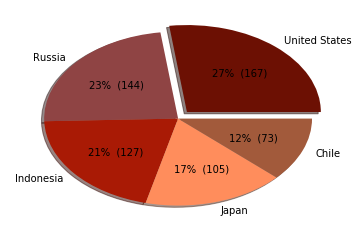

In [18]:
# Imprimindo o gráfico com o matplotlib

# Primeiramente vamos setar as labels e os valores
labels = dfCountries['Country']
values = dfCountries['Volcanoes Count']

# Vamos dar uma pequena enfase na fatia mais populada
explode = (0.1, 0, 0, 0, 0)

plt.pie(values, explode=explode, labels=labels, autopct=make_autopct(values), colors=colors, shadow=True)

## 2 - Qual a região com mais vulcões e a que tem menos?

Vamos agora para a segunda pergunta, qual a região com mais e a com menos vulcões

Para isso vamos agrupar o dataset por regiões

In [19]:
# Agrupando dataset por region
dfRegion = df.groupby(['Region'])['Volcano Number'].count()

# Transformando a Series em DataFrame
dfRegion = dfRegion.to_frame().reset_index()

# Renomeando coluna
dfRegion.rename(columns={'Volcano Number': 'Count'}, inplace=True)

# Primeiramente usamos o metodo loc para localizar o que queremos, entao com idxmax procuramos a linha com mais ocorrências
maisVulcoes  = dfRegion.loc[dfRegion['Count'].idxmax()]

# Agora a mesma coisa só que com idxmin para a região com menor número
menosVulcoes = dfRegion.loc[dfRegion['Count'].idxmin()]

# Agora vamos mostrar o resultado
print("A região que possui mais vulcões é {}, com {}, já a que tem menos é a {}, com {}."
      .format(
          maisVulcoes['Region'],
          maisVulcoes['Count'],
          menosVulcoes['Region'],
          menosVulcoes['Count']
      )
     )

A região que possui mais vulcões é South America, com 189, já a que tem menos é a West Indies, com 16.


## Representação gráfica 2ª pergunta:

Certo, até agora descobrimos que a região com mais vulcões é a América do Sul e a com menos são as Índias Ocidentais,

Vamos agora reproduzir de forma gráfica, para verificar também as demais regiões

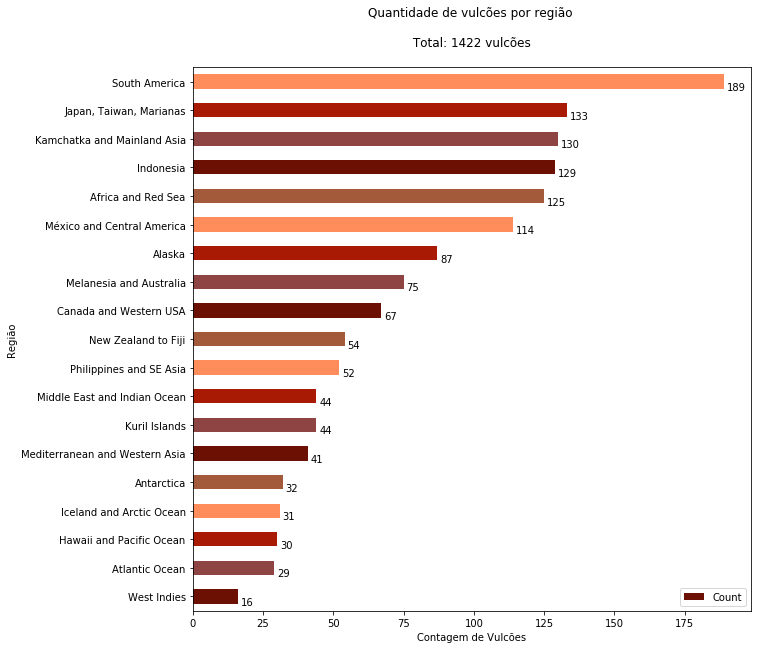

In [20]:
dfRegion.sort_values('Count', inplace=True)

ax = dfRegion.plot(dfRegion['Region'], kind='barh', color=[colors], figsize=(10,10))

for p in ax.patches:
    b=p.get_bbox()
    ax.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.title('Quantidade de vulcões por região \n\n Total: ' + str(sum(dfRegion['Count'])) + ' vulcões \n')
plt.ylabel('Região')
plt.xlabel('Contagem de Vulcões')
plt.show()


## 3 - Qual o tipo de vulcão que aparece mais vezes?

In [21]:
dfType = df.groupby(['Primary Volcano Type'])['Volcano Number'].count().to_frame().reset_index()

dfType = dfType.rename(columns={'Volcano Number': 'Volcanoes Count'})

dfType = dfType.sort_values('Volcanoes Count', ascending=False).reset_index(drop=True)

volcanoType      = dfType['Primary Volcano Type'][0]
volcanoTypeCount = dfType['Volcanoes Count'][0]

print('O tipo de vulcão mais comum no nosso conjunto de dados é o {}, com {} cadastrados.'.format(volcanoType,volcanoTypeCount))

O tipo de vulcão mais comum no nosso conjunto de dados é o Stratovolcano, com 686 cadastrados.


## Representação da 3ª pergunta:

Vamos agora nos preocupar com os tipos que tem mais de 50 vulcões, assim conseguiremos nos concentrar nos principais, 

Que segundo as prévias pesquisas que fiz de vulcões são apenas 3, então com esse tipo de consulta já vamos conseguir incluir os principais e alguns subsequentes.

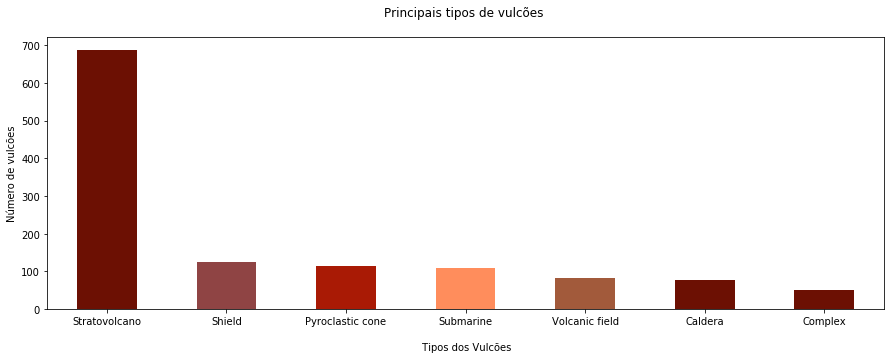

In [22]:
# Tirando do dataset os tipos com menos de 50
dfType = dfType.loc[dfType['Volcanoes Count'] > 50]

# Criando o gráfico pela contagem de vulcões, tipo barra
ax = dfType['Volcanoes Count'].plot(kind='bar', figsize=(15,5), color=colors)

# Setando as labels dos países
ax.set_xticklabels(dfType['Primary Volcano Type'], rotation='horizontal')
# Setando a label de Y
ax.set_ylabel('Número de vulcões')
# Setando a label de X
ax.set_xlabel('\n Tipos dos Vulcões')
# Setando o título do gráfico
ax.set_title('Principais tipos de vulcões \n')

plt.show()

## 4 - Quais 3 os tipos de rochas mais predominantes?

Veremos agora quais os tipos de rocha que encontramos em maior quantidade no nosso conjunto de dados.

In [23]:
dfRockType = df.groupby(['Dominant Rock Type'])['Volcano Number'].count().to_frame().reset_index()

dfRockType = dfRockType.rename(columns={'Volcano Number': 'Volcanoes Count'})

dfRockType = dfRockType.sort_values('Volcanoes Count', ascending=False).reset_index(drop=True)

rockType = dfRockType['Dominant Rock Type']

print('Os três tipo de rocha mais dominantes são: {}, {} e {}'.format(rockType[0], rockType[1], rockType[2]))

Os três tipo de rocha mais dominantes são: Andesite / Basaltic Andesite, Basalt / Picro-Basalt e Dacite


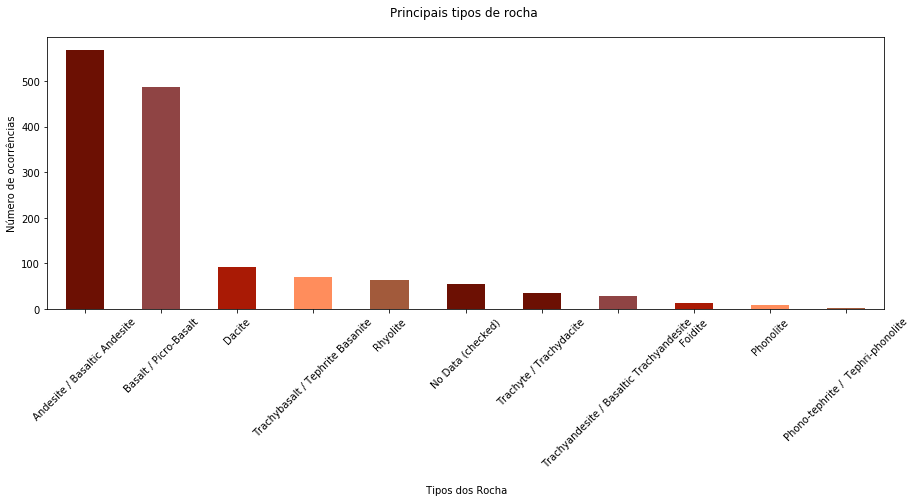

In [24]:
# Criando o gráfico pela contagem de tipos de rocha, tipo barra
ax = dfRockType['Volcanoes Count'].plot(kind='bar', figsize=(15,5), color=colors)

# Setando as labels dos países
ax.set_xticklabels(dfRockType['Dominant Rock Type'], rotation=45)
# Setando a label de Y
ax.set_ylabel('Número de ocorrências')
# Setando a label de X
ax.set_xlabel('\n Tipos dos Rocha')
# Setando o título do gráfico
ax.set_title('Principais tipos de rocha \n')

plt.show()

## 5 - Quais os vulcões mais altos?

Vamos verificar quais os vulcões mais altos em elevação, ou seja a altura em metros em relação ao nível do mar

Observe que há alguns vulcões abaixo do nível do mar que serão desconsiderados

In [25]:
'''
    Vamos ordernar os valores pela elevação, e com o parâmetro ascending = False temos a ordem descendente,
    com head pegamos apenas as 5 primeiras linhas dos resultados, que já satisfaz a resposta
'''
vulcanheight = df.sort_values('Elevation (m)', ascending=False).head()

vulcanheight

,Volcano Number,Volcano Name,Country,Primary Volcano Type,Activity Evidence,Last Known Eruption,Region,Subregion,Latitude,Longitude,Elevation (m),Dominant Rock Type,Tectonic Setting
1243,355130,"Ojos del Salado, Nevados",Chile-Argentina,Stratovolcano,Eruption Dated,750 CE,South America,"Northern Chile, Bolivia and Argentina",-27.109,-68.541,6879,Dacite,Subduction zone / Continental crust (>25 km)
1235,355110,Llullaillaco,Chile-Argentina,Stratovolcano,Eruption Observed,1877 CE,South America,"Northern Chile, Bolivia and Argentina",-24.720,-68.530,6739,Dacite,Subduction zone / Continental crust (>25 km)
1252,355220,Tipas,Argentina,Complex,Evidence Credible,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.196,-68.561,6658,No Data (checked),Subduction zone / Continental crust (>25 km)
1242,355125,"Incahuasi, Nevado de",Chile-Argentina,Stratovolcano,Evidence Uncertain,Unknown,South America,"Northern Chile, Bolivia and Argentina",-27.033,-68.296,6638,Dacite,Subduction zone / Continental crust (>25 km)
1189,354003,Coropuna,Peru,Stratovolcano,Evidence Credible,Unknown,South America,Peru,-15.520,-72.650,6377,Andesite / Basaltic Andesite,Subduction zone / Continental crust (>25 km)


## Análise sobre os maiores vulcões

Podemos observar que os maiores vulcões se encontram na América do Sul, que também é a região onde há mais vulcões

Além disso, pelo menos os 5 maiores, se encontram nas regiões do Chile e da Argentina

E o tipo de vulcão predominante é Stratovolcano (estratovulcão)

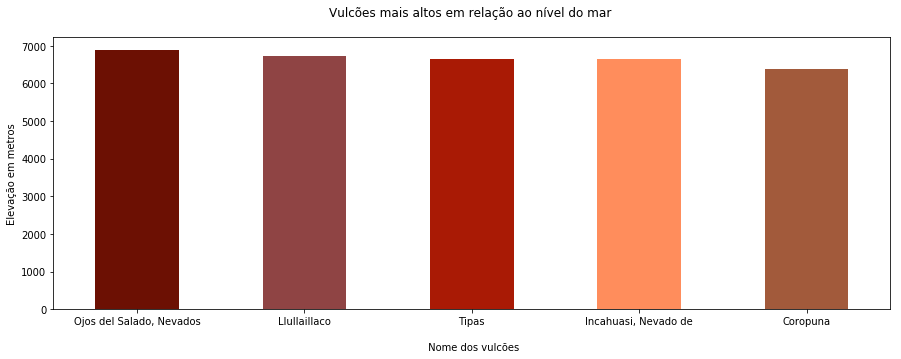

In [26]:
# Criando o gráfico de altura
ax = vulcanheight['Elevation (m)'].plot(kind='bar', figsize=(15,5), color=colors)

# Setando as labels dos países
ax.set_xticklabels(vulcanheight['Volcano Name'], rotation=0)
# Setando a label de Y
ax.set_ylabel('Elevação em metros')
# Setando a label de X
ax.set_xlabel('\n Nome dos vulcões')
# Setando o título do gráfico
ax.set_title('Vulcões mais altos em relação ao nível do mar \n')

plt.show()

## Sobre estes vulcões:

As alturas deles são bem parecidas, todos tem uma elevação maior que 6500m

## 6 - Há influência da elevação?

In [27]:
# Criando o gráfico de altura
ax = vulcanheight['Country'].plot(kind='bar', figsize=(15,5), color=colors)

# Setando as labels dos países
ax.set_xticklabels(vulcanheight['Volcano Name'], rotation=0)
# Setando a label de Y
ax.set_ylabel('Elevação em metros')
# Setando a label de X
ax.set_xlabel('\n Nome dos vulcões')
# Setando o título do gráfico
ax.set_title('Vulcões mais altos em relação ao nível do mar \n')

plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot